In [170]:
using Colors
using BenchmarkTools
using Plots

In [171]:
#Salto temporal
function turno(T)
    NT = copy(T)
    for i in 1:N ,j in 1:N
        aux = 0
        for l in [i-1,i,i+1]
        #print(l)
            for m in [j-1,j,j+1]
                #println("Fila $l columuna $m")
                if (l==i)&(m==j)
                    continue
                end
                try
                    #println("Posicion $i ,$j"Ci[l,m])
                    aux += T[l,m]
                catch
                    continue
                end
            end
        end
        vec = aux
        #print(vec)
        if T[i,j] == 0
            if vec == 3     #Nacimiento
                NT[i,j] = 1
            end
        else
            if (vec < 2)||(vec > 3)     #Muerte
                NT[i,j] = 0
            end
        end
    end
    return NT
end

turno (generic function with 1 method)

In [172]:
N = 25 #Casillas
Ci = rand(0:1,N,N) #Matriz inicial

25×25 Matrix{Int64}:
 0  0  1  1  0  0  0  0  1  1  1  0  0  0  1  0  0  0  1  0  1  1  0  0  0
 1  0  1  1  1  1  1  1  0  0  1  1  1  0  0  1  1  1  0  0  0  0  0  1  1
 0  1  1  0  1  1  0  0  0  0  0  1  1  0  0  1  1  0  1  1  0  1  1  1  1
 1  0  0  1  1  1  0  0  1  1  1  1  0  1  0  0  1  1  0  0  1  1  0  1  0
 1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  1  1  1  0  0  1  1  1
 0  0  0  0  0  0  0  1  0  1  1  0  0  0  0  1  0  1  1  0  1  1  1  0  1
 1  0  0  1  1  0  0  0  1  1  0  0  1  0  1  1  0  0  0  0  1  1  0  1  0
 1  0  1  1  1  1  0  0  1  1  1  0  0  0  0  0  1  1  1  1  1  0  1  1  0
 0  0  1  1  0  0  1  0  1  1  1  0  0  0  1  0  0  1  0  0  0  1  0  0  0
 1  0  0  1  1  0  1  0  0  0  1  0  1  0  0  0  1  0  0  1  1  1  1  0  0
 1  0  1  1  1  0  1  0  1  0  1  0  1  1  0  1  0  0  1  1  1  0  1  1  0
 1  1  1  1  1  0  1  1  1  0  1  1  0  0  1  0  0  1  0  1  1  0  0  0  1
 1  0  0  0  1  0  0  1  0  0  1  0  1  0  1  1  0  1  1  0  0  1  0  1  0
 0  

In [173]:
#Ci[3,1] = 1;
#Ci

In [174]:
#Definición de función iterativa
(^)(f::Function, i::Int) = i==1 ? f : x->(f^(i-1))(f(x))

^ (generic function with 1 method)

In [175]:
#Verificación de turno 1
(turno^1)(Ci)==turno(Ci)

true

  4.494376 seconds (371.35 k allocations: 23.454 MiB, 0.64% gc time, 0.25% compilation time)


[ Info: Saved animation to /home/sapc/Desktop/Jupyters/Untitled Folder/tmp.gif


Plots.AnimatedGif("/home/sapc/Desktop/Jupyters/Untitled Folder/tmp.gif")
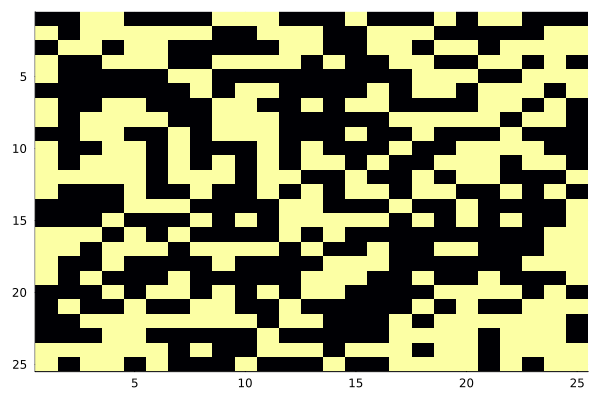

In [176]:

@time @gif for l in (0:10) #Numero de iteraciones
    if l==0 #Condición inicial
        b=Ci
    else
        b=(turno^l)(Ci) #Turnos
    end
    heatmap(b, legend = :none,yflip=true)
end